# Marine Protected Areas API exploration

References:

* https://www.protectedplanet.net/en 

In [1]:
from urllib.request import urlopen
import ssl, json, os, sys
from pyld import jsonld

In [2]:
apicall = "https://mpa.protectedseas.net/php/mpa_search.php?lat=33.90689555128866&lon=-119.46258544921874&high=true&mid=true&low=true&min=true&v=1&lang=en_EN"
detailscall = "https://mpa.protectedseas.net/php/mpaDetail.php?gid=156&complexity=118&rid=0&v=1&lang=en_EN"

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

f = urlopen(detailscall)
jr = f.read()
json_object = json.loads(jr)
json_formatted_str = json.dumps(json_object, indent=2)

## Notes

There are two ways we can look at this.  We need to convert this likely to something like a Creative Works / Map.  Something like we have done at: https://book.oceaninfohub.org/thematics/docs/maps.html.  We could also do this at a Dataset, but that would take a bit of a broad interpretation. 

To convert from JSON to JSON-LD we can either parse and build or look at some sort of generic conversion or workflow like OpenRefine.  



In [4]:
data = {}

data['https://schema.org/name'] = json_object["site_name"]
data['@id'] = "http://example.org/1"   # json_object["url"]
data['https://schema.org/description'] = json_object["purpose"]

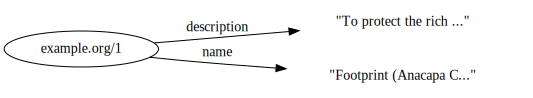

In [5]:
currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, currentdir)
from lib import jbutils

context = {"@vocab": "https://schema.org/"}
compacted = jsonld.compact(data, context)

jbutils.show_graph(compacted)

In [41]:
print(json_object)

{'site_id': 'NMF960', 'site_name': 'Footprint (Anacapa Channel) Federal Marine Reserve', 'url': 'MPA Website|https://www.wildlife.ca.gov/Conservation/Marine/MPAs/Network/Southern-California', 'country': 'USA', 'state': 'CA  ', 'managing_authority': 'NOAA National Marine Fisheries Service', 'designation': 'Federal Marine Reserve', 'purpose': 'To protect the rich kelp forest ecosystem that is home to abalone, crabs, eel, Garibaldi, rock fish, sea bass, sea lions, eel, lobster, sea urchins and many other marine residents in the kelp forest ecosystem.', 'restrictions': '1. Take of all living marine resources is prohibited. <br>2. Possessing fishing gear onboard a vessel unless such gear is stowed and not available for immediate use. <br>3. Possessing any Sanctuary resource, except legally-taken fish onboard a vessel at anchor or in transit.', 'allowed': 'None.', 'regulation_name': '15 C.F.R. § 922.73', 'regulation_url': 'Regulations Text|https://www.ecfr.gov/cgi-bin/text-idx?SID=d2d103de41

In [37]:
print(json_formatted_str)

{
  "site_id": "NMF960",
  "site_name": "Footprint (Anacapa Channel) Federal Marine Reserve",
  "url": "MPA Website|https://www.wildlife.ca.gov/Conservation/Marine/MPAs/Network/Southern-California",
  "country": "USA",
  "state": "CA  ",
  "managing_authority": "NOAA National Marine Fisheries Service",
  "designation": "Federal Marine Reserve",
  "purpose": "To protect the rich kelp forest ecosystem that is home to abalone, crabs, eel, Garibaldi, rock fish, sea bass, sea lions, eel, lobster, sea urchins and many other marine residents in the kelp forest ecosystem.",
  "restrictions": "1. Take of all living marine resources is prohibited. <br>2. Possessing fishing gear onboard a vessel unless such gear is stowed and not available for immediate use. <br>3. Possessing any Sanctuary resource, except legally-taken fish onboard a vessel at anchor or in transit.",
  "allowed": "None.",
  "regulation_name": "15 C.F.R. \u00a7 922.73",
  "regulation_url": "Regulations Text|https://www.ecfr.gov/c